In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_excel('online_retail_II.xlsx','Year 2009-2010')

In [16]:
## Eliminar datos atipicos (precio)
Q1 = np.percentile(df['Price'], 25)
Q3 = np.percentile(df['Price'], 75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

df = df[(df['Price'] >= 0) & (df['Price'] <= upper_threshold)]

In [17]:
## Eliminar datos atipicos (cantidad)
Q1 = np.percentile(df['Quantity'], 25)
Q3 = np.percentile(df['Quantity'], 75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

df = df[(df['Quantity'] >= 0) & (df['Quantity'] <= upper_threshold)]

In [18]:
## Analsis de consumo de productos por pais
country = df.loc[:, ['Country', 'Quantity']].groupby(['Country']).sum()
result = country.sort_values(by=['Quantity'], ascending=False)
print(f"El pais con mas productos es {result.idxmax()[0]} con {result['Quantity'][0]} productos consumidos")


El pais con mas productos es United Kingdom con 2408362 productos consumidos


In [19]:
## Productos mas vendidos
country = df.loc[:, ['Description','Quantity']].groupby(['Description']).sum()
result = country.sort_values(by=['Quantity'], ascending=False)
print("Productos mas vendidos")
result.head(5)

Productos mas vendidos


,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,18525
PACK OF 72 RETRO SPOT CAKE CASES,18008
60 TEATIME FAIRY CAKE CASES,15761
ASSORTED COLOUR BIRD ORNAMENT,13877
STRAWBERRY CERAMIC TRINKET BOX,13457


In [20]:
## Productos con mayor recaudación
df['Earnings'] = df['Quantity'] * df['Price']
country = df.loc[:, ['Description','Earnings']].groupby(['Description']).sum()
result = country.sort_values(by=['Earnings'], ascending=False)
print("Productos con mayor recaudación")
result.head(5)

Productos con mayor recaudación


,Earnings
Description,
WHITE HANGING HEART T-LIGHT HOLDER,56828.76
PARTY BUNTING,28273.78
HOME BUILDING BLOCK WORD,27807.76
VINTAGE UNION JACK BUNTING,25491.69
ASSORTED COLOUR BIRD ORNAMENT,24097.89


Las ventas tienden a aumentar los ultimos meses del año tenineod un pico en noviembre


<Axes: xlabel='Month'>

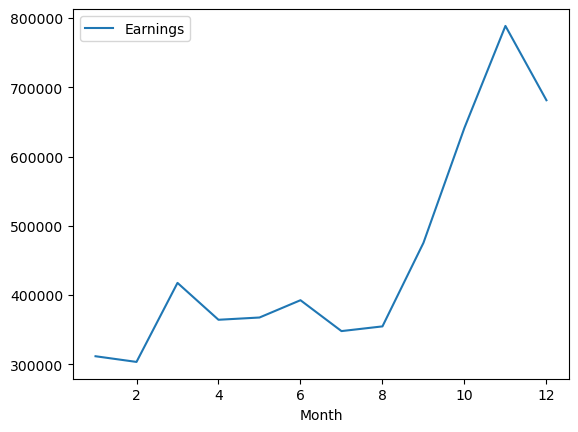

In [21]:
df['Month'] = df['InvoiceDate'].dt.month
peaks = df.loc[:, ['Month','Earnings']].groupby(['Month']).sum()
result = peaks.sort_values(by=['Month'])
print('Las ventas tienden a aumentar los ultimos meses del año tenineod un pico en noviembre')
result.plot()

No existe correlación entre el precio y la cantidad de ventas


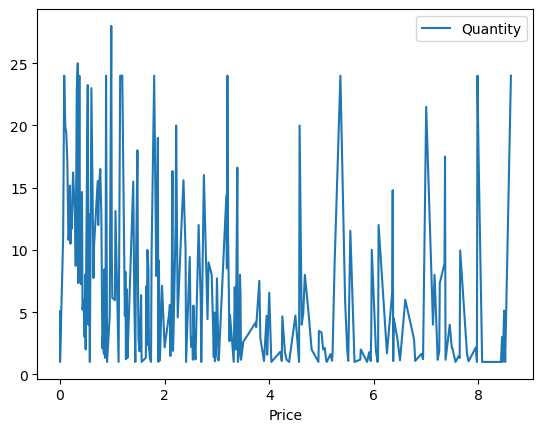

In [22]:
correlation = df.loc[:, ['Price','Quantity']].groupby(['Price']).mean()
correlation.plot()
print('No existe correlación entre el precio y la cantidad de ventas')